In [31]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.fftpack import fft

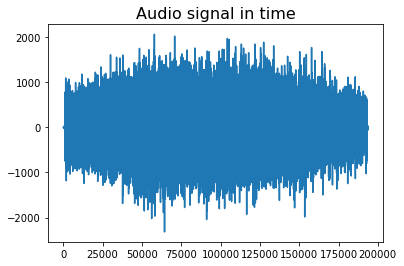

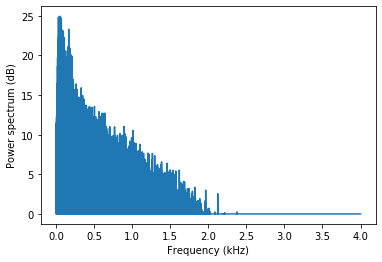

In [37]:
from scipy.io import wavfile # scipy library to read wav files
import numpy as np

#list of samples[sample1.wav, sample2.wav, ThePiedPiper.wav] Choose one below. 
#Other files will work too, just convert them to .wav first.
AudioName = "sample2.wav" # Audio File

fs, Audiodata = wavfile.read(AudioName)
if len(Audiodata.shape) == 2:
    Audiodata = Audiodata[0:,0]
# Plot the audio signal in time
import matplotlib.pyplot as plt
plt.plot(Audiodata)
plt.title('Audio signal in time',size=16)

# spectrum
from scipy.fftpack import fft # fourier transform
n = len(Audiodata) 
AudioFreq = fft(Audiodata)
AudioFreq = AudioFreq[0:int(np.ceil((n+1)/2.0))] #Half of the spectrum
MagFreq = np.abs(AudioFreq) # Magnitude
MagFreq = MagFreq / float(n)
# power spectrum
MagFreq = MagFreq**2
if n % 2 > 0: # ffte odd 
    MagFreq[1:len(MagFreq)] = MagFreq[1:len(MagFreq)] * 2
else:# fft even
    MagFreq[1:len(MagFreq) -1] = MagFreq[1:len(MagFreq) - 1] * 2 

[0.1 if x<1 else x for x in MagFreq]

FreqMagnitude = 10*np.log10(MagFreq)
FreqMagnitude = FreqMagnitude.clip(min=0)

plt.figure()
freqAxis = np.arange(0,int(np.ceil((n+1)/2.0)), 1.0) * (fs / n);
plt.plot(freqAxis/1000.0, FreqMagnitude) #Power spectrum
plt.xlabel('Frequency (kHz)'); plt.ylabel('Power spectrum (dB)');


In [33]:
10*np.log10(MagFreq)

array([ -4.01953246,   1.95351966,  -5.78193022, ..., -56.04274607,
       -64.05731993, -84.1516103 ])

In [34]:
len(Audiodata.shape)

1

In [35]:
AudioFreq.shape

(72577,)

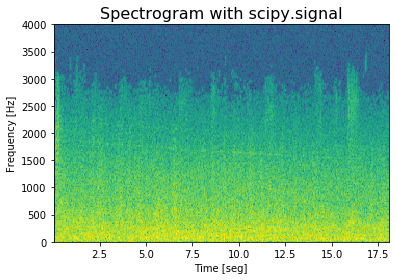

In [36]:
#Spectrogram
from scipy import signal
N = 512 #Number of point in the fft
f, t, Sxx = signal.spectrogram(Audiodata, fs,window = signal.blackman(N),nfft=N)
plt.figure()
plt.pcolormesh(t, f,10*np.log10(Sxx)) # dB spectrogram
#plt.pcolormesh(t, f,Sxx) # Lineal spectrogram
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [seg]')
plt.title('Spectrogram with scipy.signal',size=16);

plt.show()    
    